**Brian Blaylock**  
*September 20, 2021*

# 🗺 Add common features to your maps with `EasyMap`
When I first learned cartopy, it was difficult to know how to add things to a map. Now that I am more experienced, I know what I like to put on my maps to build the base layer. Instead of recoding all these tasks of adding different features, I simplified and put all these feature layers into functions in my `EasyMap` class. Now I can create a cartopy axes and add different features to it, or add features to an existing cartopy axes.

One common line I dislike typing so much is `ccrs.PlateCarree()`. Lucky for you, this value is stored in the variable `pc` in cartopy_tools and can be imported.

In [1]:
import matplotlib.pyplot as plt

from toolbox import EasyMap, pc, ccrs

## 🐰 Quickly create a Cartopy axes, add features, and change feature style
There are two ways to initalize the `EasyMap` class. By default, the COASTLINES method is always called.

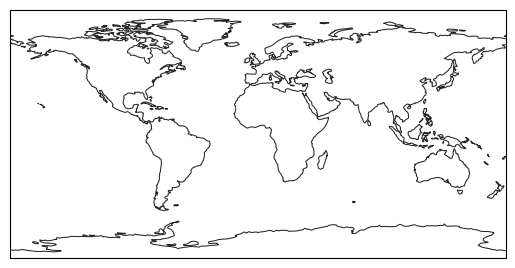

In [2]:
# m is for "map", this returns a class instance
m = EasyMap()
m

<GeoAxes: >

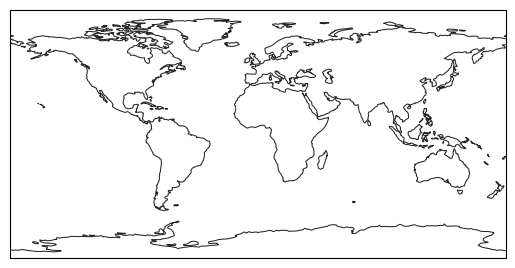

In [3]:
# But you most likely want to interacti with the axis object
ax = EasyMap().ax
ax

You can add additional features and adjust parameters for it. Just remember to ask for the `ax` property at the end.

/home/blaylock/miniconda3/envs/herbie-dev/lib/python3.11/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_cultural/ne_110m_admin_0_boundary_lines_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


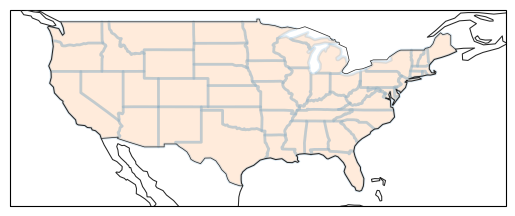

In [4]:
# Add STATES feature, and adjust the display arguments
ax = (
    EasyMap()
    .STATES(edgecolor="tab:blue", linewidth=2, facecolor="tab:orange")
    .BORDERS()
    .ax
)
ax.set_extent([-130, -60, 23, 45])

You can even specify the projection, and then plot things on the returned axes.

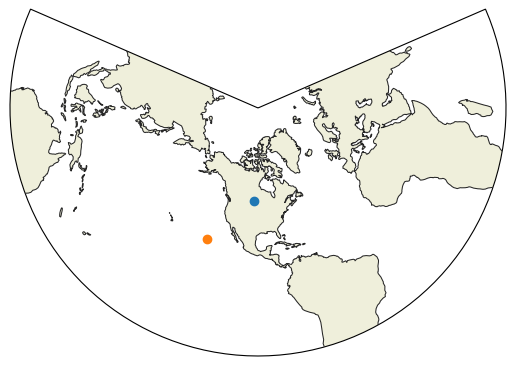

In [5]:
# LambertConformal Projection
ax = EasyMap(crs=ccrs.LambertConformal()).LAND().ax

# Add single points
ax.scatter(-100, 50, transform=pc)
ax.scatter(-130, 20, transform=pc)

ax.set_global()

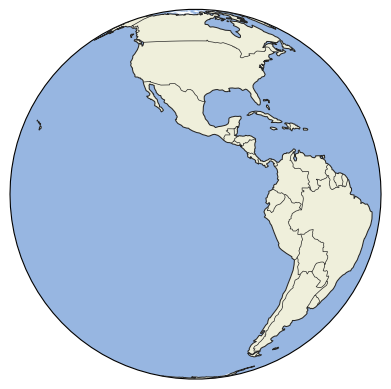

In [6]:
# Geostationary Projection
crs = ccrs.Geostationary(central_longitude=-100)
ax = EasyMap(crs=crs).BORDERS().OCEAN().LAND()

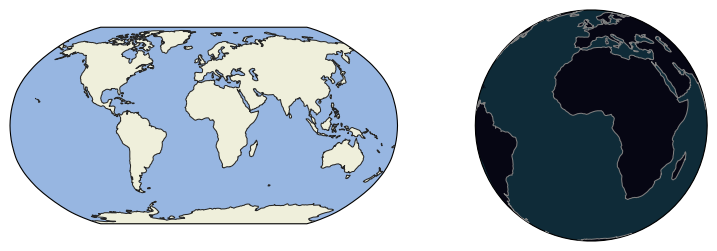

In [7]:
# There is even a dark themed map!

fig = plt.figure(figsize=(10,3))
ax1 = fig.add_subplot(1, 2, 1, projection=ccrs.Robinson())
ax2 = fig.add_subplot(1, 2, 2, projection=ccrs.Geostationary())

EasyMap(ax=ax1).OCEAN().LAND()
EasyMap(ax=ax2, dark=True).OCEAN().LAND()

plt.subplots_adjust(wspace=0)

## 📚 Summary of `EasyMap`
By default, `COASTLINES=True` to always plot coastlines, but you can set that to False if it's not needed.

<div class="alert alert-info">
Note: You may change the Stamen zoom level in the <i>STAMEN_kwargs</i>.
</div>


In [8]:
a = [
    'COASTLINES',
    'BORDERS',
    'STATES',
    #'COUNTIES',
    'OCEAN',
    #'LAND',
    #'RIVERS',
    #'LAKES',
    #'ROADS',
    #'STAMEN',   
]

/home/blaylock/miniconda3/envs/herbie-dev/lib/python3.11/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_physical/ne_10m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/home/blaylock/miniconda3/envs/herbie-dev/lib/python3.11/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_cultural/ne_10m_admin_0_boundary_lines_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/home/blaylock/miniconda3/envs/herbie-dev/lib/python3.11/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_cultural/ne_10m_admin_1_states_provinces_lakes.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/home/blaylock/miniconda3/envs/herbie-dev/lib/python3.11/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_physical/ne_10m_oce

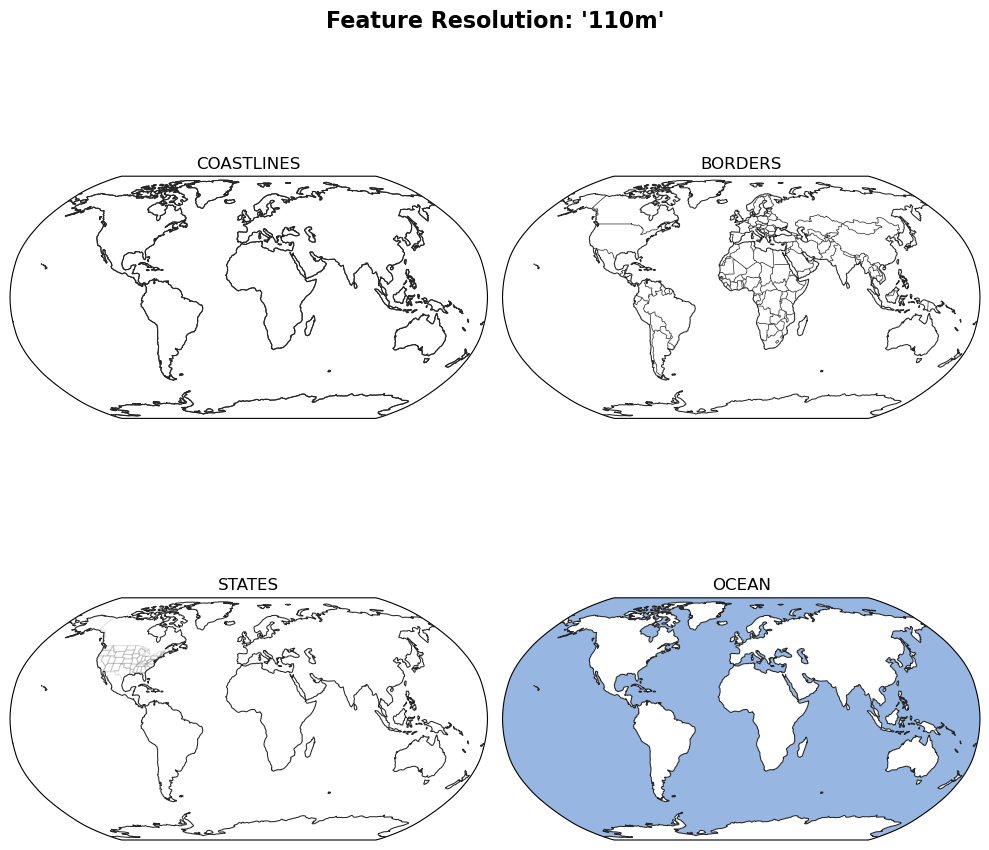

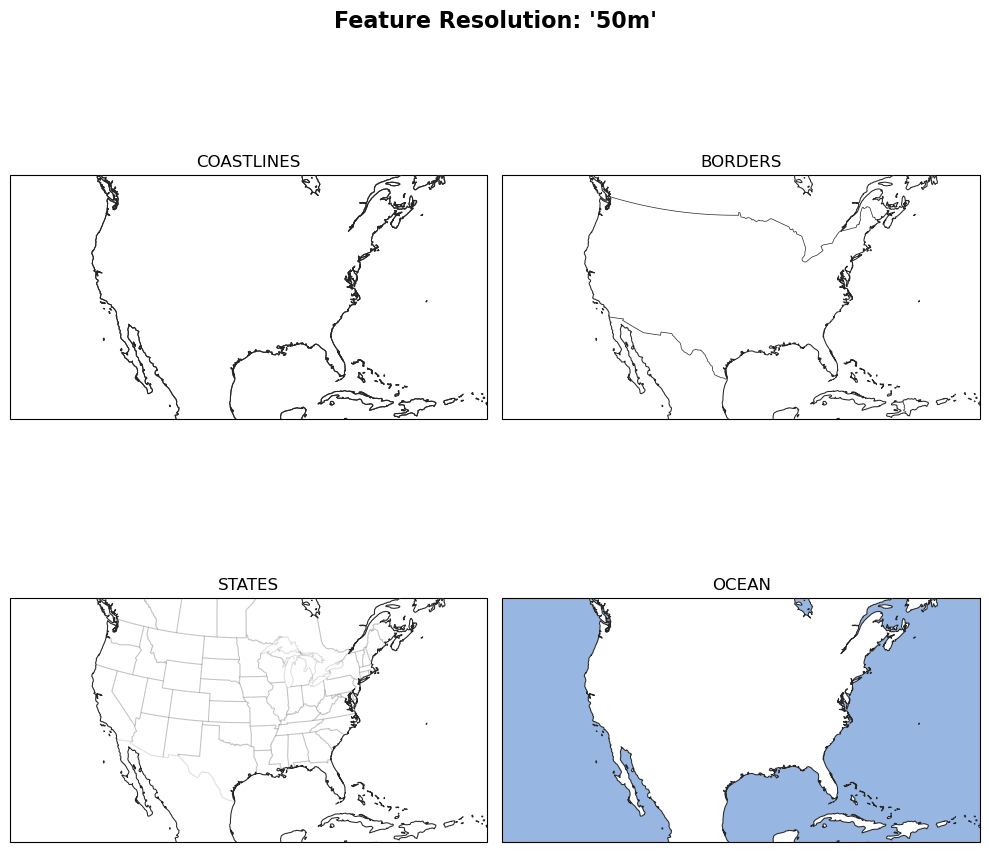

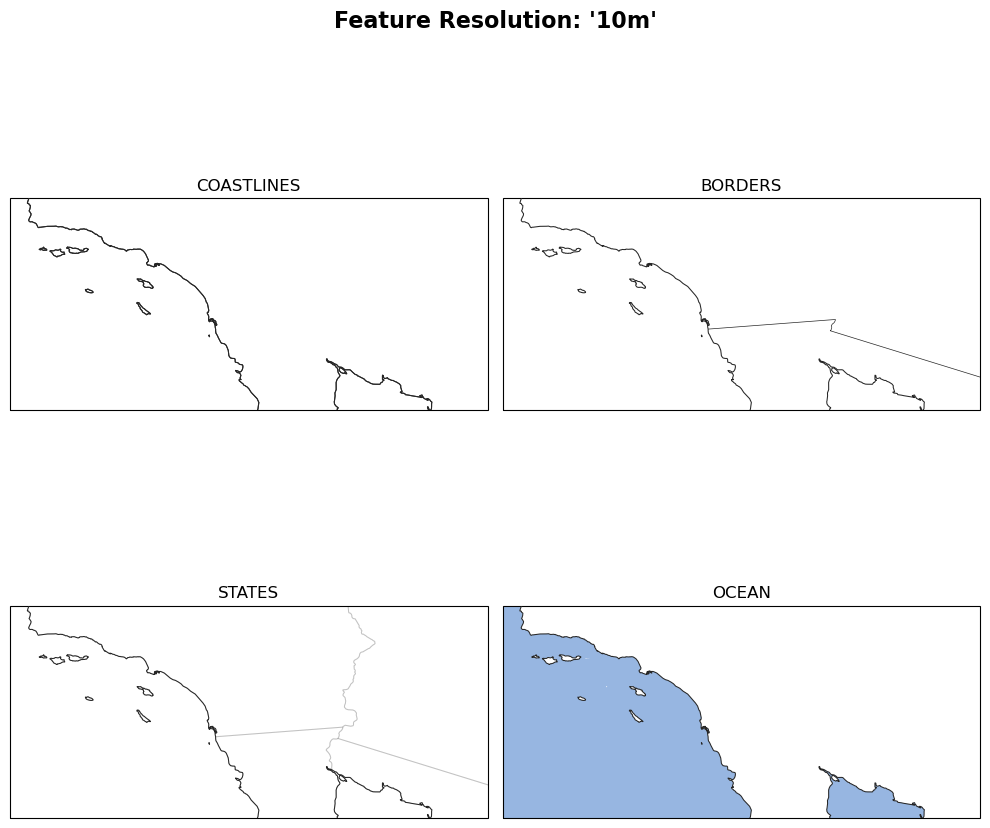

In [9]:
for res, crs in zip(['110m', '50m', '10m'], [ccrs.Robinson(), ccrs.LambertConformal(), pc]):
    plt.figure(figsize=(10,10))
    for i, feature in enumerate(a, 1):
        nrows = int(len(a)/2)
        ax = plt.subplot(nrows, 2, i, projection=crs)
        
        #getattr(EasyMap(), 'STATES')()
        getattr(EasyMap(res, ax=ax), feature)()
        
        if res == '50m':
            ax.set_extent([-130, -60, 20, 50], ccrs.PlateCarree())
        elif res == '10m':
            ax.set_extent([-121, -112, 31, 35], ccrs.PlateCarree())
            
        ax.set_title(feature)

    plt.suptitle(f"Feature Resolution: '{res}'",
                 fontsize=16, ha='center',
                 fontweight='semibold')
    plt.subplots_adjust(wspace=-.26)
    plt.tight_layout()
    plt.savefig(f'../images/features_summary_{res}', bbox_inches='tight')

## 🌓 Light and Dark themed maps

/home/blaylock/miniconda3/envs/herbie-dev/lib/python3.11/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/50m_physical/ne_50m_rivers_lake_centerlines.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/home/blaylock/miniconda3/envs/herbie-dev/lib/python3.11/site-packages/cartopy/mpl/style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '
/home/blaylock/miniconda3/envs/herbie-dev/lib/python3.11/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/50m_physical/ne_50m_lakes.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


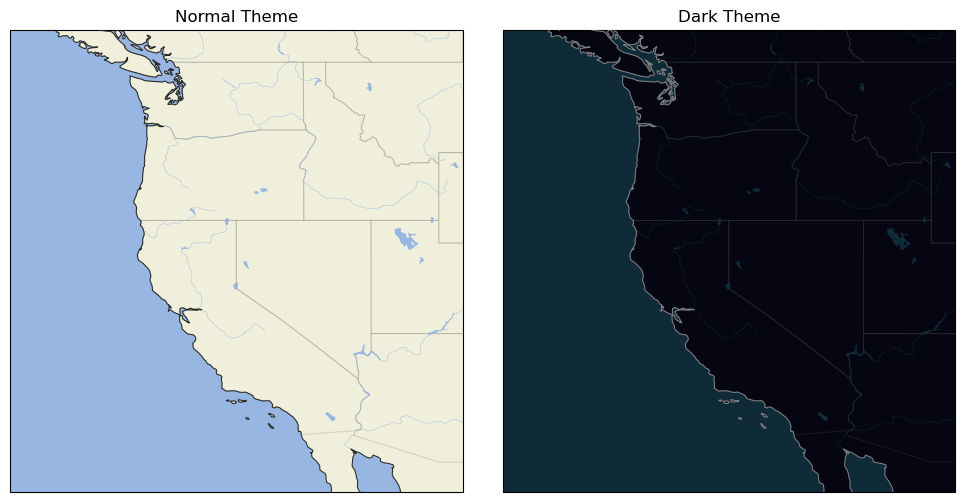

In [10]:
add_features = dict(
    COASTLINES=True,
    OCEAN=True,
    LAND=True,
    STATES=True,
    RIVERS=True,
    LAKES=True
)


fig, (ax1, ax2) = plt.subplots(1, 2, subplot_kw={'projection': pc}, figsize=[10,5])

for ax in (ax1, ax2):
    ax.set_extent([-130, -110, 30, 50])

EasyMap('50m', ax=ax1).OCEAN().LAND().STATES().RIVERS().LAKES()
ax1.set_title('Normal Theme')


EasyMap('50m', ax=ax2, dark=True).OCEAN().LAND().STATES().RIVERS().LAKES()
ax2.set_title('Dark Theme')

plt.tight_layout()
plt.savefig(f'../images/light-dark', bbox_inches='tight')

## 🛣 Roads
All major roads, from the Natural Earth feature

/home/blaylock/miniconda3/envs/herbie-dev/lib/python3.11/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_cultural/ne_10m_roads.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


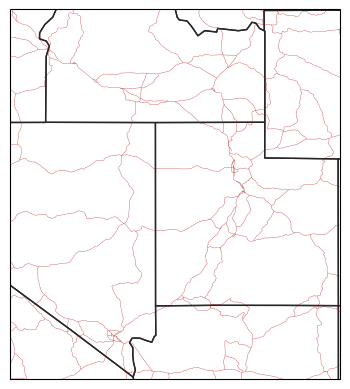

In [11]:
ax = EasyMap().STATES(linewidth=1, alpha=1).ROADS().ax
ax.set_extent([-118, -109, 35, 45])

You may separate by road type

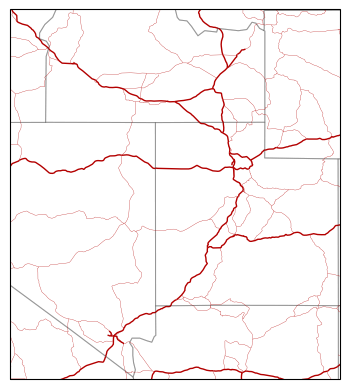

In [12]:
ax = EasyMap().STATES().ROADS(road_types=['Major Highway'], linewidth=1).ax
ax = EasyMap().STATES().ROADS(road_types=['Secondary Highway']).ax

ax.set_extent([-118, -109, 35, 45])

## 🏙 Label Major Cities

/home/blaylock/miniconda3/envs/herbie-dev/lib/python3.11/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_cultural/ne_10m_populated_places.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


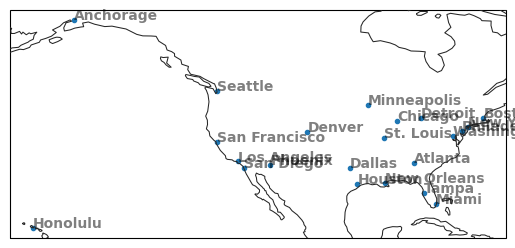

In [13]:
ax = EasyMap().PLACES(scatter=True)

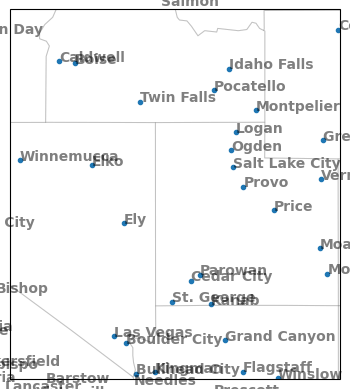

In [14]:
# Large cities have small rank 
# Small cities have large rank
ax = EasyMap().STATES().PLACES(rank=7).ax

ax.set_extent([-118, -109, 35, 45])

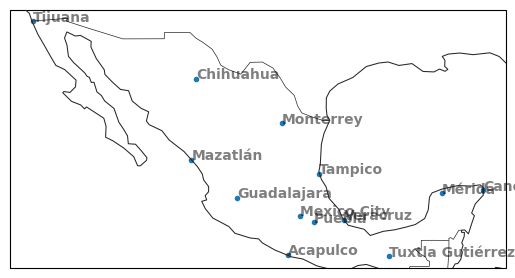

In [15]:
ax = EasyMap().BORDERS().PLACES(rank=3, country='Mexico')

# ⏹ Modify the map extent
These methods are attached to the ax instance
- ax.center_extent()
- ax.adjust_extent()
- ax.copy_extent()

## Center Extent
When you create a map, it shows the global extent

<GeoAxes: >

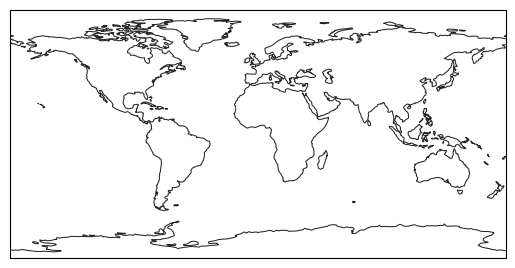

In [16]:
ax = EasyMap().ax
ax

you can center the map at a point with `center_extent`

(-125.0, -115.0, 35.0, 45.0)

/home/blaylock/miniconda3/envs/herbie-dev/lib/python3.11/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_physical/ne_10m_lakes.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


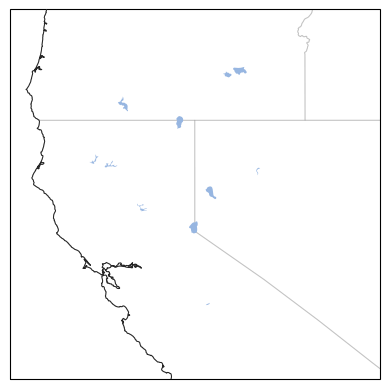

In [17]:
ax = EasyMap('10m').STATES().LAKES().ax
ax.center_extent(lat=40, lon=-120)

(-121.5, -118.5, 38.5, 41.5)

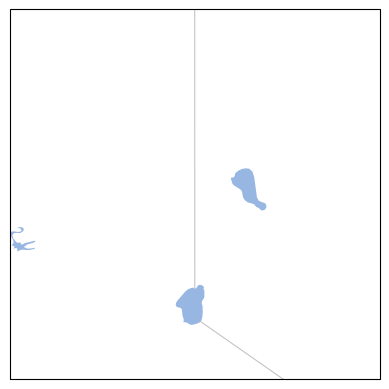

In [18]:
m = EasyMap('10m').STATES().LAKES()
m.ax.center_extent(lat=40, lon=-120, pad=1.5)   # Adjust the padding to zoom in or out.

You can center the map on a state's centroid...

Here's the Polygon; you may need to do `_.geoms[i]` to get Polygons from the shape.
Here's the Polygon; you may need to do `_.geoms[i]` to get Polygons from the shape.
Here's the Polygon; you may need to do `_.geoms[i]` to get Polygons from the shape.
Here's the Polygon; you may need to do `_.geoms[i]` to get Polygons from the shape.


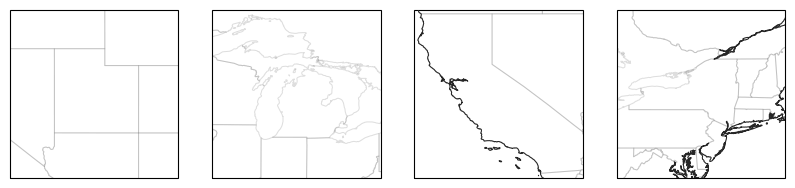

In [19]:
states = ['UT', 'MI', 'CA', 'NY']
fig, axes = plt.subplots(1, len(states), subplot_kw={'projection': pc}, figsize=[10,5])

for ax, st in zip(axes, states):
    EasyMap('10m', ax=ax).STATES()
    ax.center_extent(state=st)

You can also center the map on a major city

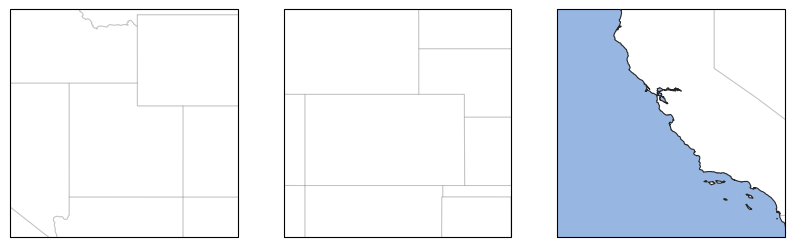

In [22]:
cities = ['Provo', 'Denver', 'Monterey']
fig, axes = plt.subplots(1, len(cities), subplot_kw={'projection': pc}, figsize=[10,5])

for ax, city in zip(axes, cities):
    EasyMap('10m', ax=ax).STATES().OCEAN()
    ax.center_extent(city=city)

You may also adjust the extent with `adjust_extent`. This is useful if cartopy has auto zoomed on an area after you plotted a point. The pad amount is in the crs coordinates. For PlateCarree this is in degrees. 

(-115.5, -84.5, 27.799999999999997, 52.2)

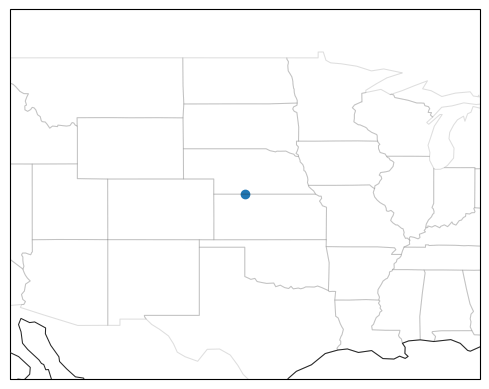

In [23]:
ax = EasyMap().STATES().ax
ax.scatter(-100, 40)
ax.adjust_extent(pad=10)

(-115.5, -84.5, 37.25, 42.75)

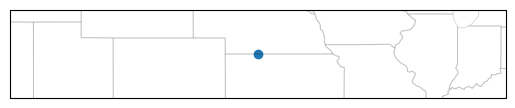

In [24]:
ax = EasyMap().STATES().ax
ax.scatter(-100, 40)
ax.adjust_extent(pad=dict(left=10, right=10))

You may also center the extent on a city from the "populated places" Natural Earth dataset

(-121.22749, -111.22749, 38.60859, 48.60859)

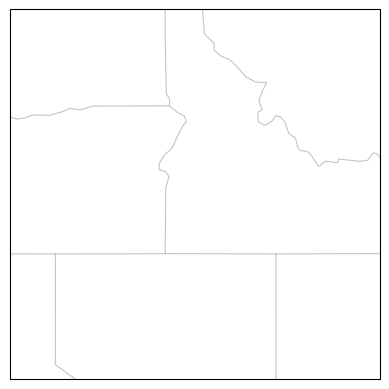

In [25]:
ax = EasyMap().STATES().ax
ax.scatter(-100, 40)
ax.center_extent(city='Boise')

You can also copy an extent to another map

(-125.0, -115.0, 35.0, 45.0)

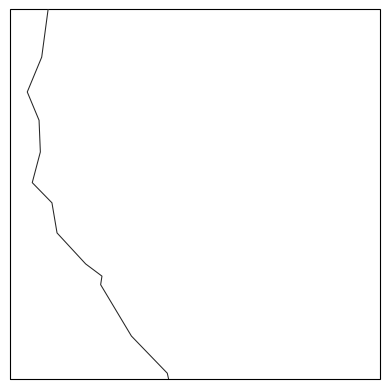

In [26]:
# Create an initial map and adjust the extent
ax1 = EasyMap().ax
ax1.center_extent(lat=40, lon=-120)

(-125.0, -115.0, 35.0, 45.0)

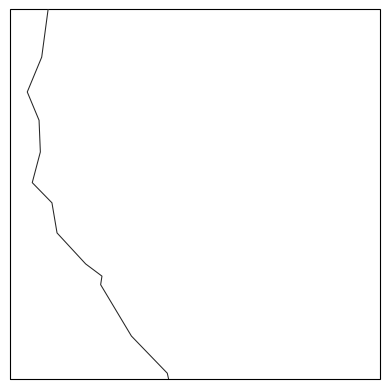

In [27]:
#copy the extent from ax1 to ax2

ax2 = EasyMap().ax
ax2.copy_extent(ax1)

# 🌎 Global Inset
It is often nice to include an inset map showing the location an extent is on the globe.

<GeoAxes: >

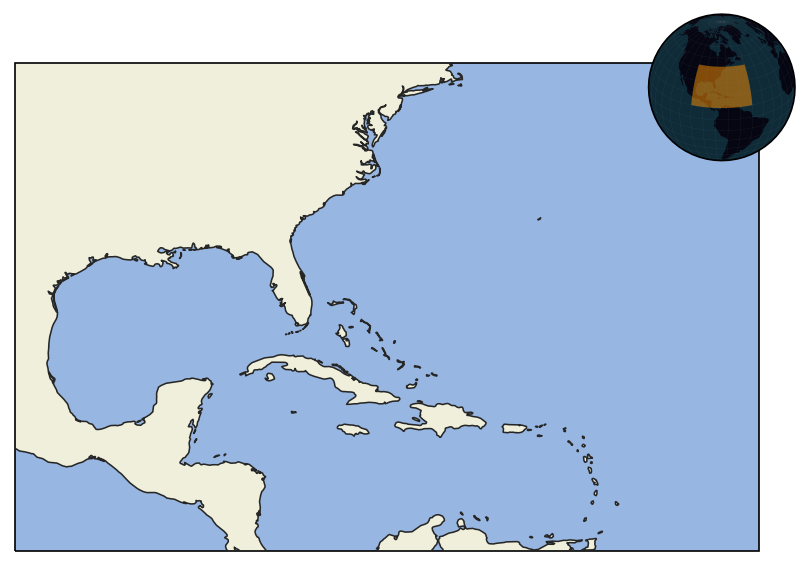

In [34]:
ax = EasyMap('50m', dpi=150).OCEAN().LAND().ax
ax.set_extent([-100, -50, 10, 40])
ax.EasyMap.INSET_GLOBE()

<GeoAxes: >

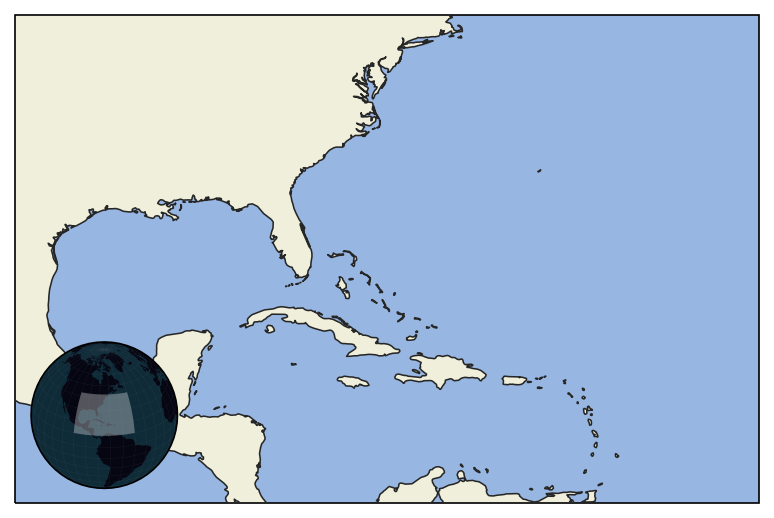

In [41]:
# Change position of inset globe

ax = EasyMap('50m', dpi=150).OCEAN().LAND().ax
ax.set_extent([-100, -50, 10, 40])
ax.EasyMap.INSET_GLOBE(x=.12, y=.18, facecolor='#ffffff50')

# 🔲 Domain Border
Add a domain border with `domain_border` from an xarray Dataset that has `latitude` and `longitude` coordinates. The x and y values must be 2D arrays of the grid you want to plot. This is useful for showing the extent of a model domain.

In [28]:
from herbie import Herbie

In [29]:
# Get some HRRR model as an xarray DataSet
H = Herbie('2021-04-02').xarray('TMP:2 m')

✅ Found ┊ model=hrrr ┊ product=sfc ┊ 2021-Apr-02 00:00 UTC F00 ┊ GRIB2 @ aws ┊ IDX @ aws
👨🏻‍🏭 Created directory: [/home/blaylock/data/hrrr/20210402]


<GeoAxes: >

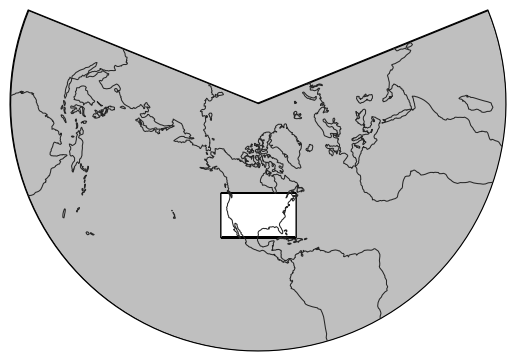

In [30]:
ax = EasyMap(crs=H.herbie.crs).DOMAIN(H).ax
ax

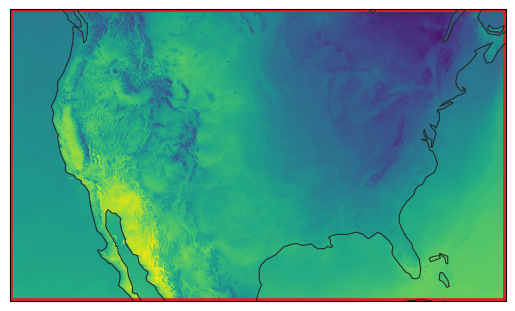

In [42]:
ax = EasyMap(crs=H.herbie.crs).DOMAIN(H, method='border', edgecolor='tab:red', lw=4).ax

ax.pcolormesh(H.longitude, H.latitude, H.t2m, transform=pc)

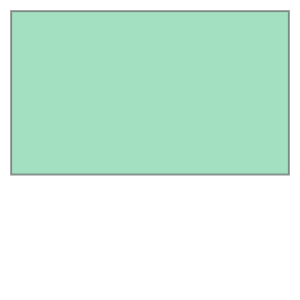

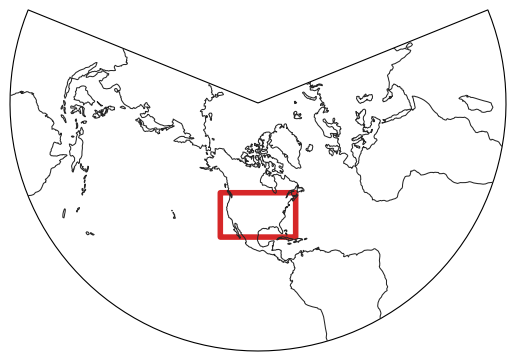

In [43]:
m = EasyMap(crs=H.herbie.crs).DOMAIN(H, method='border', edgecolor='tab:red', lw=4)
m.domain_polygon

## Domain: Bounding box
For when you need to box out a boudning box in lat/lon corners

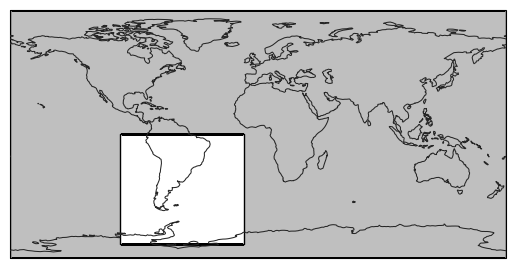

In [48]:
import numpy as np

# Create a mesh grid of the four sides of the box
xs, ys = np.meshgrid([-100, -10], [-80, 0])

EasyMap().DOMAIN(xs, ys)

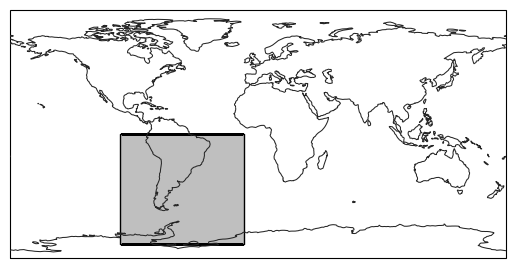

In [45]:
EasyMap().DOMAIN(xs, ys, method='fill')

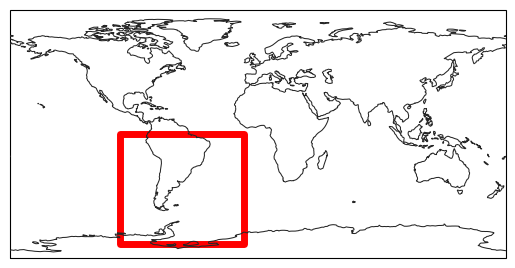

In [46]:
EasyMap().DOMAIN(xs, ys, method='border', edgecolor='red', lw=5)